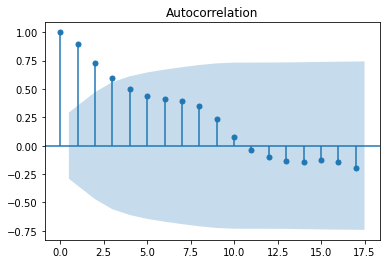

In [1]:
import os
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

path = '/DISK-0/gokul/ENGY/data/'
storm_name='amphan'
storm = storm_name+'_3_q/'+'eape'
data = np.loadtxt(path + storm + '.txt')
tsaplots.plot_acf(data)
plt.show()



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Load the time series data from text files into numpy arrays
data1 = np.loadtxt('/home/gokulsuresh/Downloads/eape2eke.txt')
data2 = np.loadtxt('/home/gokulsuresh/Downloads/cksum.txt')
data3 =- np.loadtxt('/home/gokulsuresh/Downloads/diss.txt')
data4 = np.loadtxt('/home/gokulsuresh/Downloads/eapebsum.txt')
data5 = np.loadtxt('/home/gokulsuresh/Downloads/kebsum.txt')

# Load EKE data
eke = np.loadtxt('/home/gokulsuresh/Downloads/eke.txt')

# Compute the sum of the five variables
sum_of_variables = data1 + data2 + data3 + data4 + data5

# Compute the partial correlation between each variable and the sum of variables for EKE
partial_corr_values_eke = []
for data in [data1, data2, data3, data4, data5]:
    partial_corr = pg.partial_corr(data=pd.DataFrame({'variable': data, 'sum': eke}), x='variable', y='sum', covar=None)
    partial_corr_values_eke.append(partial_corr['r'].values[0])

# Create a DataFrame to store the partial correlation coefficients for EKE
partial_corr_df_eke = pd.DataFrame(np.array(partial_corr_values_eke).reshape(1, -1), columns=['CPK', 'CK', 'DE', 'ΦEB', 'KEB'])

# Plot the partial correlation coefficients for EKE as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(partial_corr_df_eke, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation with EKE')
plt.xlabel('Conversion rate variables')
plt.ylabel('Partial Correlation')
plt.show()

# Compute the partial correlation between each variable and the sum of variables for total flux
partial_corr_values_total_flux = []
for data in [data1, data2, data3, data4, data5]:
    partial_corr = pg.partial_corr(data=pd.DataFrame({'variable': data, 'sum': sum_of_variables}), x='variable', y='sum', covar=None)
    partial_corr_values_total_flux.append(partial_corr['r'].values[0])

# Create a DataFrame to store the partial correlation coefficients for total flux
partial_corr_df_total_flux = pd.DataFrame(np.array(partial_corr_values_total_flux).reshape(1, -1), columns=['CPK', 'CK', 'DE', 'ΦEB', 'KEB'])

# Plot the partial correlation coefficients for total flux as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(partial_corr_df_total_flux, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation with Total Flux')
plt.xlabel('Conversion rate variables')
plt.ylabel('Partial Correlation')
plt.show()
print(data1)
print(data2)
print(data3)
print(data4)
print(data5)
print(sum_of_variables)
print(eke)
from scipy.stats import pearsonr

# Compute the correlation between the sum of variables and EKE
correlation_coefficient, p_value = pearsonr( eke,sum_of_variables)
partial_corr = pg.partial_corr(data=pd.DataFrame({'variable': eke , 'sum': sum_of_variables}), x='variable', y='sum', covar=None)

print("Correlation coefficient between sum of variables and EKE:", partial_corr)
from scipy.signal import correlate

# Calculate cross-correlation between EKE and sum_of_variables
ccf = correlate(eke, sum_of_variables)

# Generate lags corresponding to the cross-correlation values
lags = np.arange(-len(eke) + 1, len(eke))

# Find the lag with the maximum absolute correlation
max_lag = lags[np.argmax(np.abs(ccf))]

# Plot cross-correlation function using bar plot
plt.figure(figsize=(8, 6))
plt.bar(lags, ccf, width=0.5)
plt.title('Cross-Correlation between EKE and Sum of Variables')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

# Annotate the plot with the maximum lag magnitude and correlation
plt.annotate(f'Max lag at {max_lag} with correlation {np.max(np.abs(ccf)):.2f}', 
             xy=(max_lag, np.max(ccf)),
             xytext=(max_lag + 20, np.max(ccf) - 0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()




ModuleNotFoundError: No module named 'pingouin'

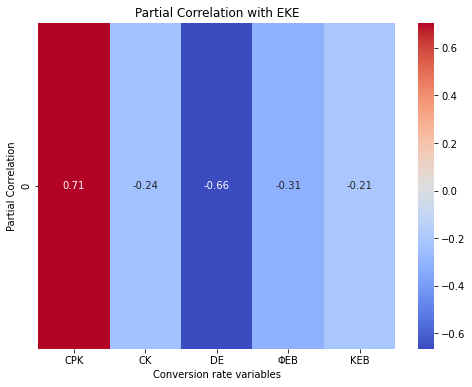

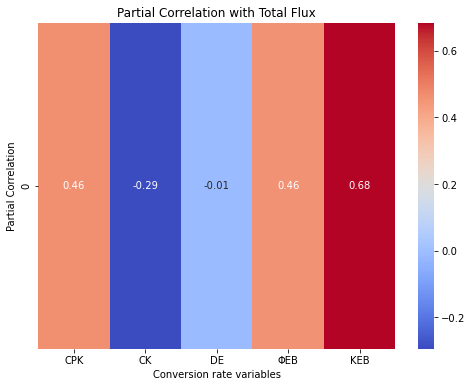

Correlation coefficient between sum of variables and EKE: -0.021256949630928293


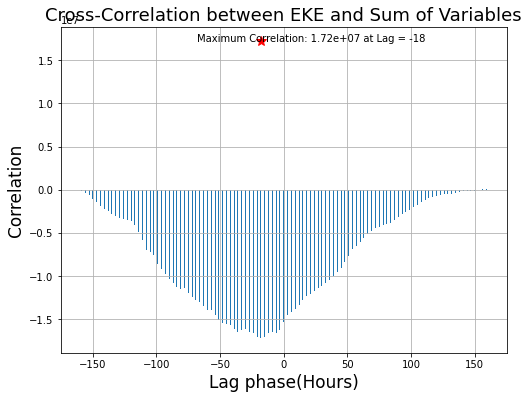

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.signal import correlate

# Load the time series data from text files into numpy arrays
data1 = np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/eape2eke.txt')
data2 = np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/cksum.txt')
data3 =- np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/diss.txt')
data4 = np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/eapebsum.txt')
data5 = np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/kebsum.txt')

# Load EKE data
eke = np.loadtxt('/DISK-0/gokul/ENGY/data/madi_3_q/eke.txt')

# Compute the sum of the five variables
sum_of_variables = data1 + data2 + data3 + data4 + data5

# Define a function to compute partial correlation
def partial_corr(x, y, z):
    """
    Compute the partial correlation between x and y, controlling for z.
    """
    # Compute correlations between x, y, and z
    corr_xy = pearsonr(x, y)[0]
    corr_xz = pearsonr(x, z)[0]
    corr_yz = pearsonr(y, z)[0]
    
    # Compute partial correlation
    partial_corr = (corr_xy - (corr_xz * corr_yz)) / np.sqrt((1 - corr_xz**2) * (1 - corr_yz**2))
    
    return partial_corr

# Compute the partial correlation between each variable and the sum of variables for EKE
partial_corr_values_eke = [partial_corr(data, eke, sum_of_variables) for data in [data1, data2, data3, data4, data5]]

# Create a DataFrame to store the partial correlation coefficients for EKE
partial_corr_df_eke = pd.DataFrame(np.array(partial_corr_values_eke).reshape(1, -1), columns=['CPK', 'CK', 'DE', 'ΦEB', 'KEB'])

# Plot the partial correlation coefficients for EKE as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(partial_corr_df_eke, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation with EKE')
plt.xlabel('Conversion rate variables')
plt.ylabel('Partial Correlation')
plt.show()

# Compute the partial correlation between each variable and the sum of variables for total flux
partial_corr_values_total_flux = [partial_corr(data, sum_of_variables, eke) for data in [data1, data2, data3, data4, data5]]

# Create a DataFrame to store the partial correlation coefficients for total flux
partial_corr_df_total_flux = pd.DataFrame(np.array(partial_corr_values_total_flux).reshape(1, -1), columns=['CPK', 'CK', 'DE', 'ΦEB', 'KEB'])

# Plot the partial correlation coefficients for total flux as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(partial_corr_df_total_flux, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation with Total Flux')
plt.xlabel('Conversion rate variables')
plt.ylabel('Partial Correlation')
plt.show()
# Compute the correlation between the sum of variables and EKE
correlation_coefficient, p_value = pearsonr(eke, sum_of_variables)
print("Correlation coefficient between sum of variables and EKE:", correlation_coefficient)

# Calculate cross-correlation between EKE and sum_of_variables
ccf = correlate(eke, sum_of_variables)

# Generate lags corresponding to the cross-correlation values
lags = np.arange(-len(eke) + 1, len(eke))

# Find the lag with the maximum absolute correlation
max_lag = lags[np.argmax(np.abs(ccf))]

# Plot cross-correlation function using bar plot
plt.figure(figsize=(8, 6))
plt.bar(lags * 3, ccf, width=0.8)
plt.title('Cross-Correlation between EKE and Sum of Variables', fontsize=18)
plt.xlabel('Lag phase(Hours)', fontsize=17)
plt.ylabel('Correlation', fontsize=17)
plt.grid(True)

# Annotating the plot with a star at the maximum lag
plt.plot(max_lag * 3, np.max(np.abs(ccf)), marker='*', markersize=10, color='red', label='Maximum Correlation')

# Labeling the star with the maximum correlation value
plt.text(max_lag * 3 - 50, np.max(np.abs(ccf)) - 0.2, f'Maximum Correlation: {np.max(np.abs(ccf)):.2e} at Lag = {max_lag * 3}', fontsize=10)
plt.savefig('Cross-correlation_NRI.png', dpi=300)
plt.show()